# Pip & Requirements

In [60]:
pip install -r /workspaces/Data-Preprocessing-Project-Tutorial/requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/workspaces/Data-Preprocessing-Project-Tutorial/requirements.txt'


In [61]:
pip install seaborn

# All Imports

In [ ]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## **Step 1: Data collection**

In [63]:
dataset_url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"


total_data = pd.read_csv(dataset_url)
total_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [64]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

In [65]:
total_data.tail(5) 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## **Step 2: Exploration and data cleaning**

In [66]:
total_data.shape

(48895, 16)

In [67]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [68]:
total_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [69]:
total_data.isnull().sum().sort_values(ascending=False) 

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [70]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
id                                0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

<Axes: >

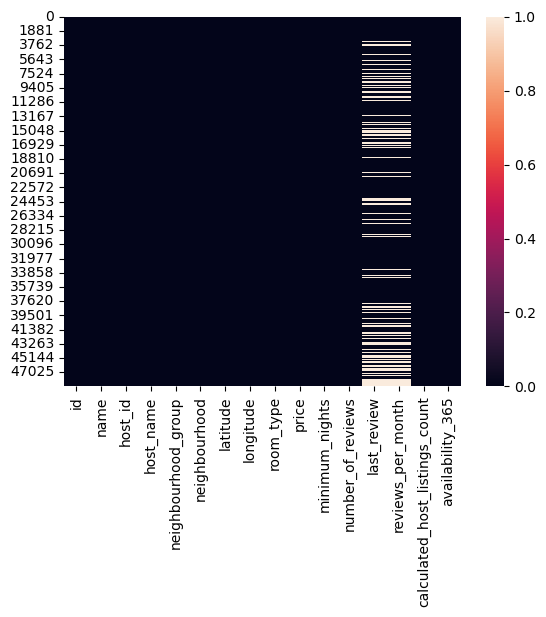

In [71]:
sns.heatmap(total_data.isnull(), annot = False)

### Null Values Management

In [72]:
#Fillna
total_data['last_review'].fillna('No review available', inplace=True)

In [73]:
#polynomial
total_data.reviews_per_month.interpolate(method='polynomial', order=2, axis=0, inplace=True)

<Axes: >

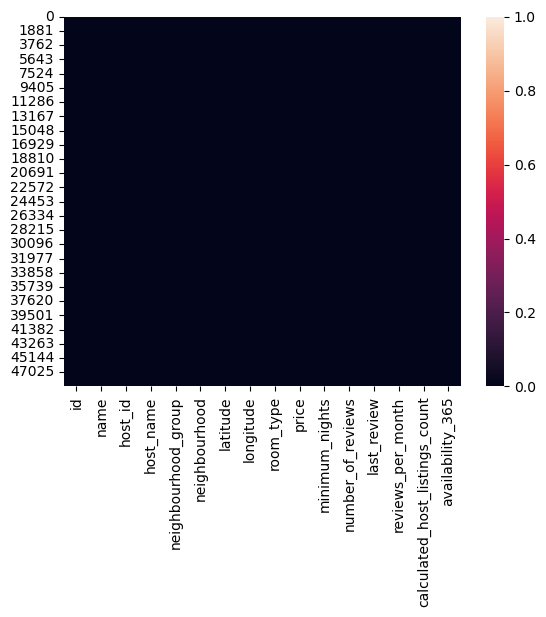

In [74]:
sns.heatmap(total_data.isnull(), annot = False)

### Descriptive Statistics

In [75]:
# descriptive statistics for percentiles
total_data.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99], include = np.number).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.000000,1.222383e+06,3.496066e+06,9.471945e+06,1.967728e+07,2.915218e+07,3.053027e+07,3.399094e+07,3.525910e+07,3.623888e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.000000,8.155641e+05,2.027013e+06,7.822033e+06,3.079382e+07,1.074344e+08,1.371296e+08,2.128114e+08,2.417646e+08,2.677118e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.499790,4.064611e+01,4.066799e+01,4.069010e+01,4.072307e+01,4.076311e+01,4.077098e+01,4.080489e+01,4.082564e+01,4.086466e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.244420,-7.400388e+01,-7.399669e+01,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.392770e+01,-7.390781e+01,-7.386577e+01,-7.377692e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.000000,4.000000e+01,4.900000e+01,6.900000e+01,1.060000e+02,1.750000e+02,2.000000e+02,2.690000e+02,3.550000e+02,7.990000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00,2.800000e+01,3.000000e+01,4.500000e+01,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,2.400000e+01,3.300000e+01,7.000000e+01,1.140000e+02,2.140000e+02,6.290000e+02
reviews_per_month,48853.0,1.399491e+00,1.785085e+00,-7.680032,2.000000e-02,5.000000e-02,1.900000e-01,7.927182e-01,2.096910e+00,2.530000e+00,3.720000e+00,4.800000e+00,7.570000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.500000e+01,2.320000e+02,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+01,2.270000e+02,2.720000e+02,3.370000e+02,3.590000e+02,3.650000e+02,3.650000e+02


In [76]:
# descriptive statistics for numerical columns
numerical_statistics = total_data.describe(include = [np.number]).T
numerical_statistics

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.000000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.000000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.499790,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.244420,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.000000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.000000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.000000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48853.0,1.399491e+00,1.785085e+00,-7.680032,1.900000e-01,7.927182e-01,2.096910e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.000000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [77]:
# descriptive statistics for categorical(object) columns
#categorical_statistics = total_data.describe(include = ['O']).T
#####No categorical(object) columns####

In [78]:
#calculates the variation between the 99th percentile and the 25th percentile for each numeric column in the DataFrame
variation_field = numerical_statistics.values[:, 7]-numerical_statistics.values[:, 3]
variation_field

array([3.64847060e+07, 2.74318875e+08, 4.13270000e-01, 5.31430000e-01,
       1.00000000e+04, 1.24900000e+03, 6.29000000e+02, 6.61800318e+01,
       3.26000000e+02, 3.65000000e+02])

In [79]:
#calculating the difference between the third quartile (Q3) and the first quartile (Q1) for each numeric column in the DataFrame
iq_distance = numerical_statistics.values[:, 6]--numerical_statistics.values[:, 4]
iq_distance

array([ 3.86241235e+07,  1.15256456e+08,  8.14532150e+01, -1.47919345e+02,
        2.44000000e+02,  6.00000000e+00,  2.50000000e+01,  2.28690950e+00,
        3.00000000e+00,  2.27000000e+02])

In [80]:
numerical_statistics["variation_field"] = variation_field

In [81]:
numerical_statistics["iq_distance"] = iq_distance

In [82]:
numerical_statistics

,count,mean,std,min,25%,50%,75%,max,variation_field,iq_distance
id,48895.0,1.901714e+07,1.098311e+07,2539.000000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07,3.648471e+07,3.862412e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.000000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08,2.743189e+08,1.152565e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.499790,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01,4.132700e-01,8.145322e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.244420,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01,5.314300e-01,-1.479193e+02
price,48895.0,1.527207e+02,2.401542e+02,0.000000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04,1.000000e+04,2.440000e+02
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.000000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03,1.249000e+03,6.000000e+00
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.000000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02,6.290000e+02,2.500000e+01
reviews_per_month,48853.0,1.399491e+00,1.785085e+00,-7.680032,1.900000e-01,7.927182e-01,2.096910e+00,5.850000e+01,6.618003e+01,2.286910e+00
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02,3.260000e+02,3.000000e+00
availability_365,48895.0,1.127813e+02,1.316223e+02,0.000000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02,3.650000e+02,2.270000e+02


In [83]:
corr = total_data.corr()
corr

C:\Users\penaf\AppData\Local\Temp\ipykernel_22336\1440578880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = total_data.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.282032,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.253923,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.008337,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.116996,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.013755,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.073844,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.437325,-0.072376,0.172028
reviews_per_month,0.282032,0.253923,-0.008337,0.116996,-0.013755,-0.073844,0.437325,1.000000,0.011390,0.156839
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,0.011390,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.156839,0.225701,1.000000


C:\Users\penaf\AppData\Local\Temp\ipykernel_22336\1443177148.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = total_data.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

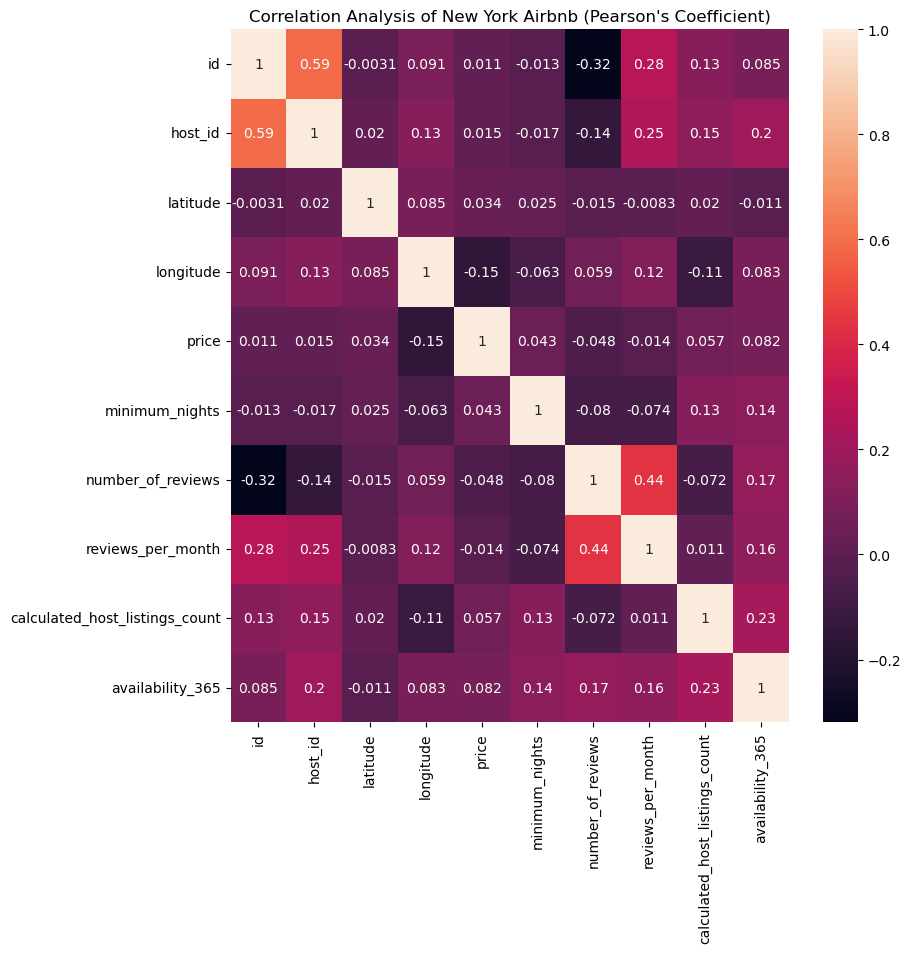

In [84]:
plt.figure(figsize=(9,9))
plt.title("Correlation Analysis of New York Airbnb (Pearson's Coefficient)")
corr = total_data.corr()
sns.heatmap(corr, annot = True)
plt.show

### Duplicates Management

In [85]:
print(total_data.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [86]:
print(f"The number of duplicated Name records is: {total_data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {total_data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


-Duplicate "Name" may be due to how the property has been named, 
-"Host ID  for properties that are owned by the same individuals who may have multiple properties. 
-The key point is that all the "IDs" are unique, so we can work with each of them separately.

### Eliminate irrelevant information

In [87]:
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


"last_review", "reviews_per_month" there are too many missing values
 "name", "host_name" duplicates and not relevant the identity to elaborate the extraction of data
 "id" not relevant to use id's 
 

## **Step 3: Analysis of univariate variables**

### Analysis on categorical variables

In [88]:
categorical_columns = total_data.select_dtypes(include = ['O'])
categorical_columns.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

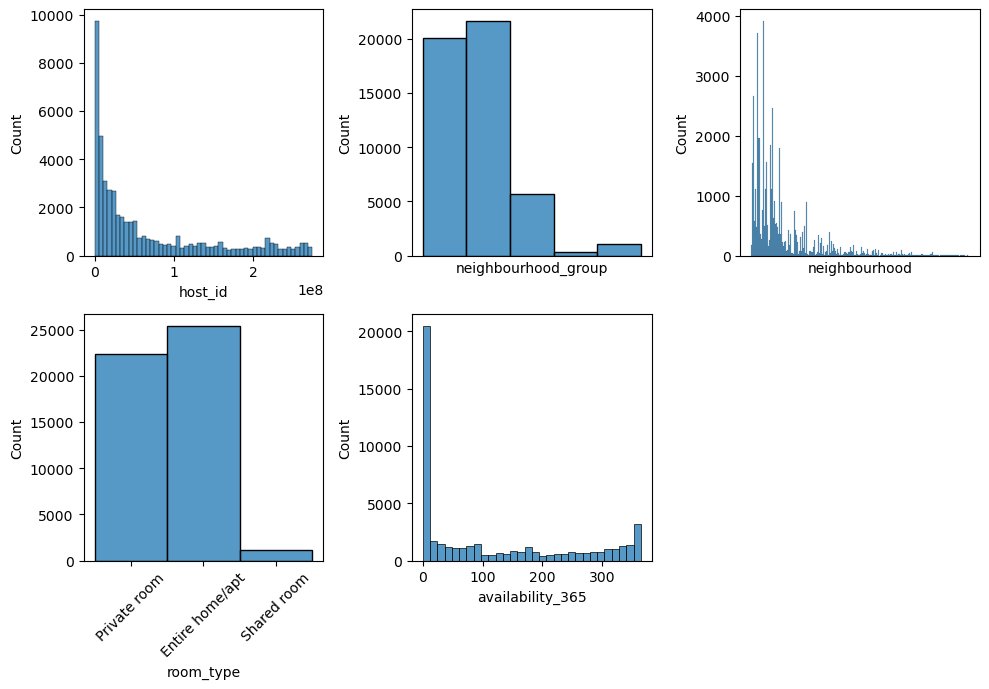

In [89]:
fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([]) #jugar con set
sns.histplot(ax=axis[1, 0], data=total_data, x="room_type")
axis[1, 0].tick_params(axis='x', labelrotation=45)
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
fig.delaxes(axis[1, 2]) #quitarlo y ver que pasa

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The Histogram reveals the following insights:

1-Numerous hosts offer multiple rooms for rent, yet there is a substantial amount of missing data (NaN) for Host_Id.


2-Our dataset encompasses only 5 areas: Brooklyn, Manhattan, Queens, Staten Island, and Bronx, which confirms our focus on New York City.


3-Certain neighborhoods exhibit a significantly higher number of Airbnb room listings compared to others.


4-Entire Homes/Apartments for rent outnumber Private Rooms, while Shared Rooms are the least available room type.


5-The majority of rooms are listed as available for 365 days a year, but the dataset contains a considerable amount of 0 or NaN values for this category, indicating potential errors or missing information.

### Analysis on numeric variables

In [90]:
numerical_columns = total_data.select_dtypes(include = np.number)
numerical_columns.columns

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

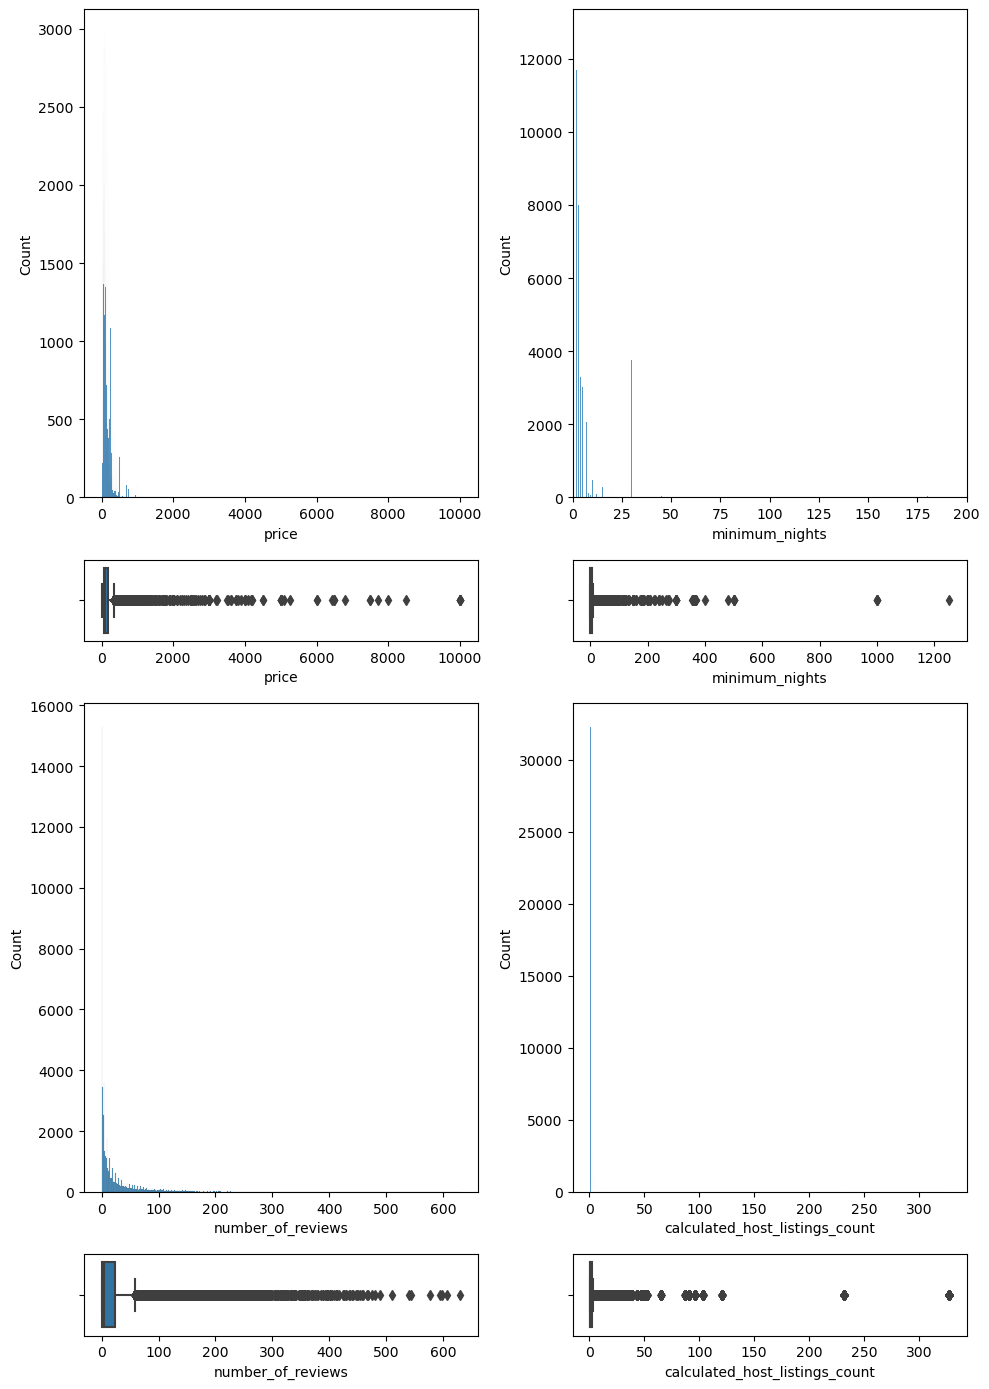

In [91]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]}) #jugar con ratio

#buscar como ampliar la imagen(bins)

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200) # jugar con los 200
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## **Step 4: Analysis of multivariate variables**

### Numerical-numerical analysis

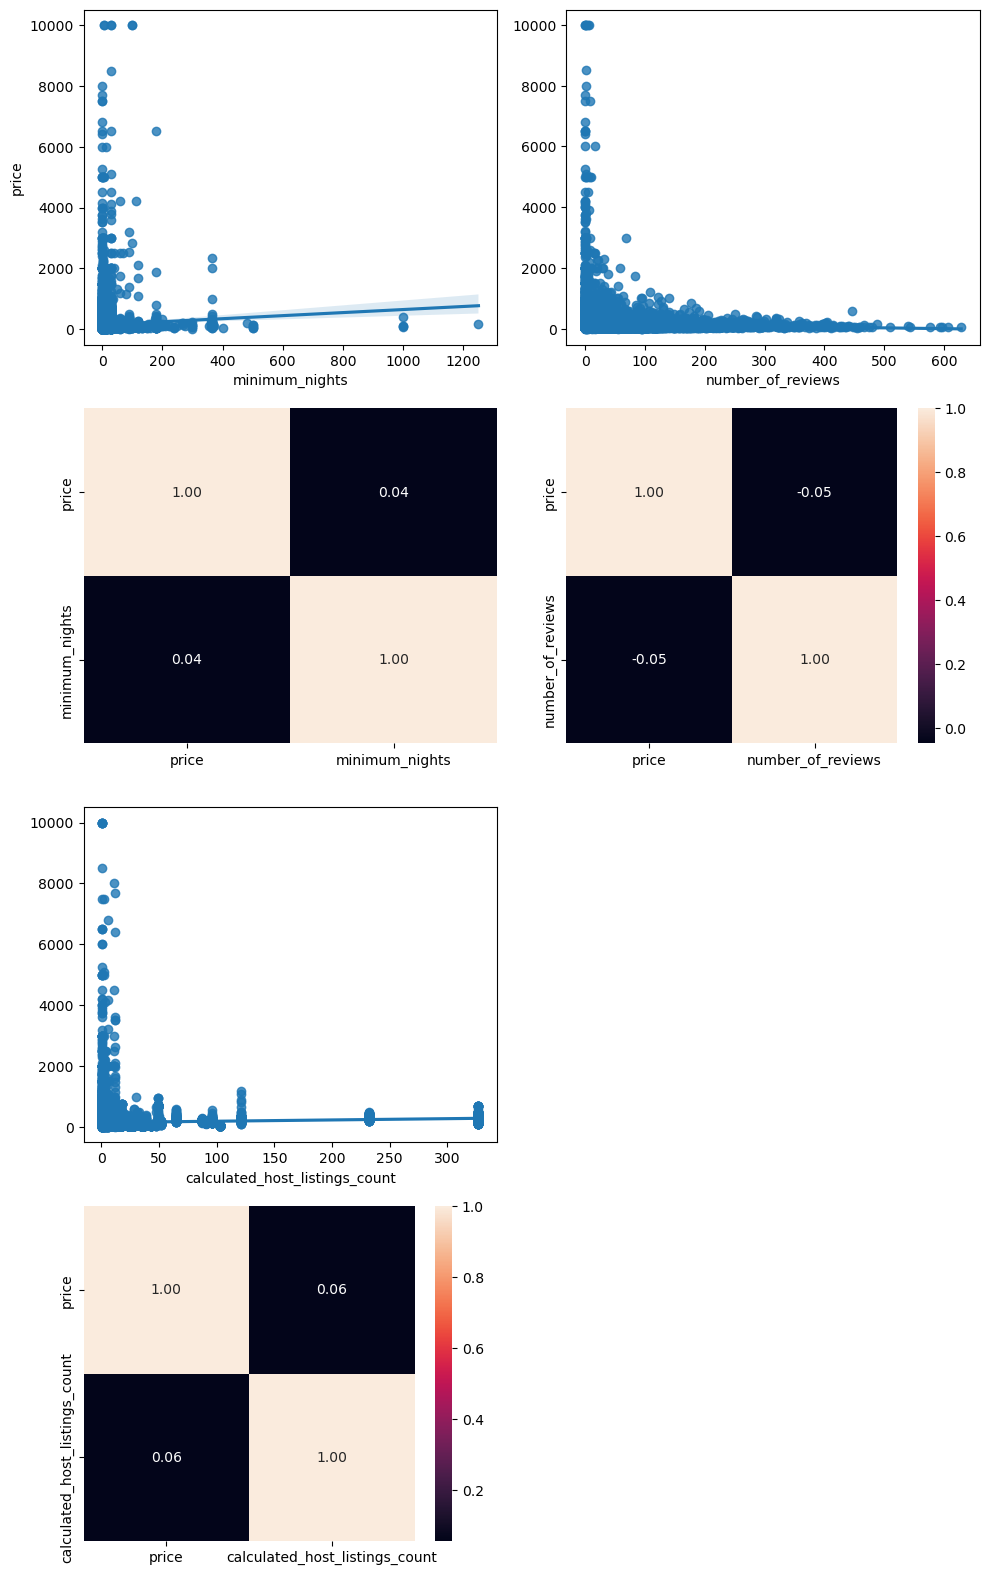

In [92]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Looking at above relationships, we see that by the correlation values:

There's no relation between the price and minimum nights.
There's no relation between the number of reviews and the price.

### Categorical-categorical analysis

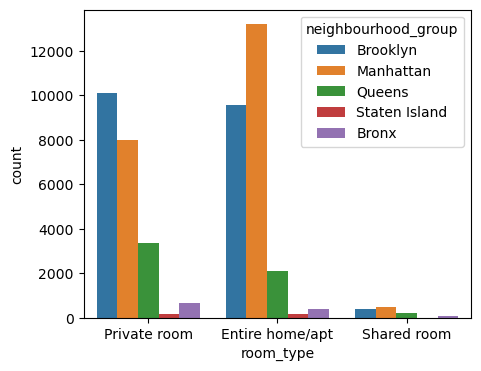

In [93]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

Based on our categorical analysis, the following conclusions can be drawn:

Manhattan stands out as the area with the highest number of available rentals, particularly for Entire Homes/Apartments.


Brooklyn ranks second in terms of the volume of rentals, but it features a higher prevalence of Private Rooms, suggesting a potential inclination towards home sharing or maximizing occupancy.


Queens and Bronx follow as the third and fourth largest groups, sharing similarities with Brooklyn in their room type distribution.
Staten Island exhibits minimal presence in the Airbnb market, with limited offerings.


Despite these trends, there isn't a strong overarching relationship between room type and neighborhood, indicating a diverse mix of rental options throughout the city

### Numerical-categorical analysis (complete)

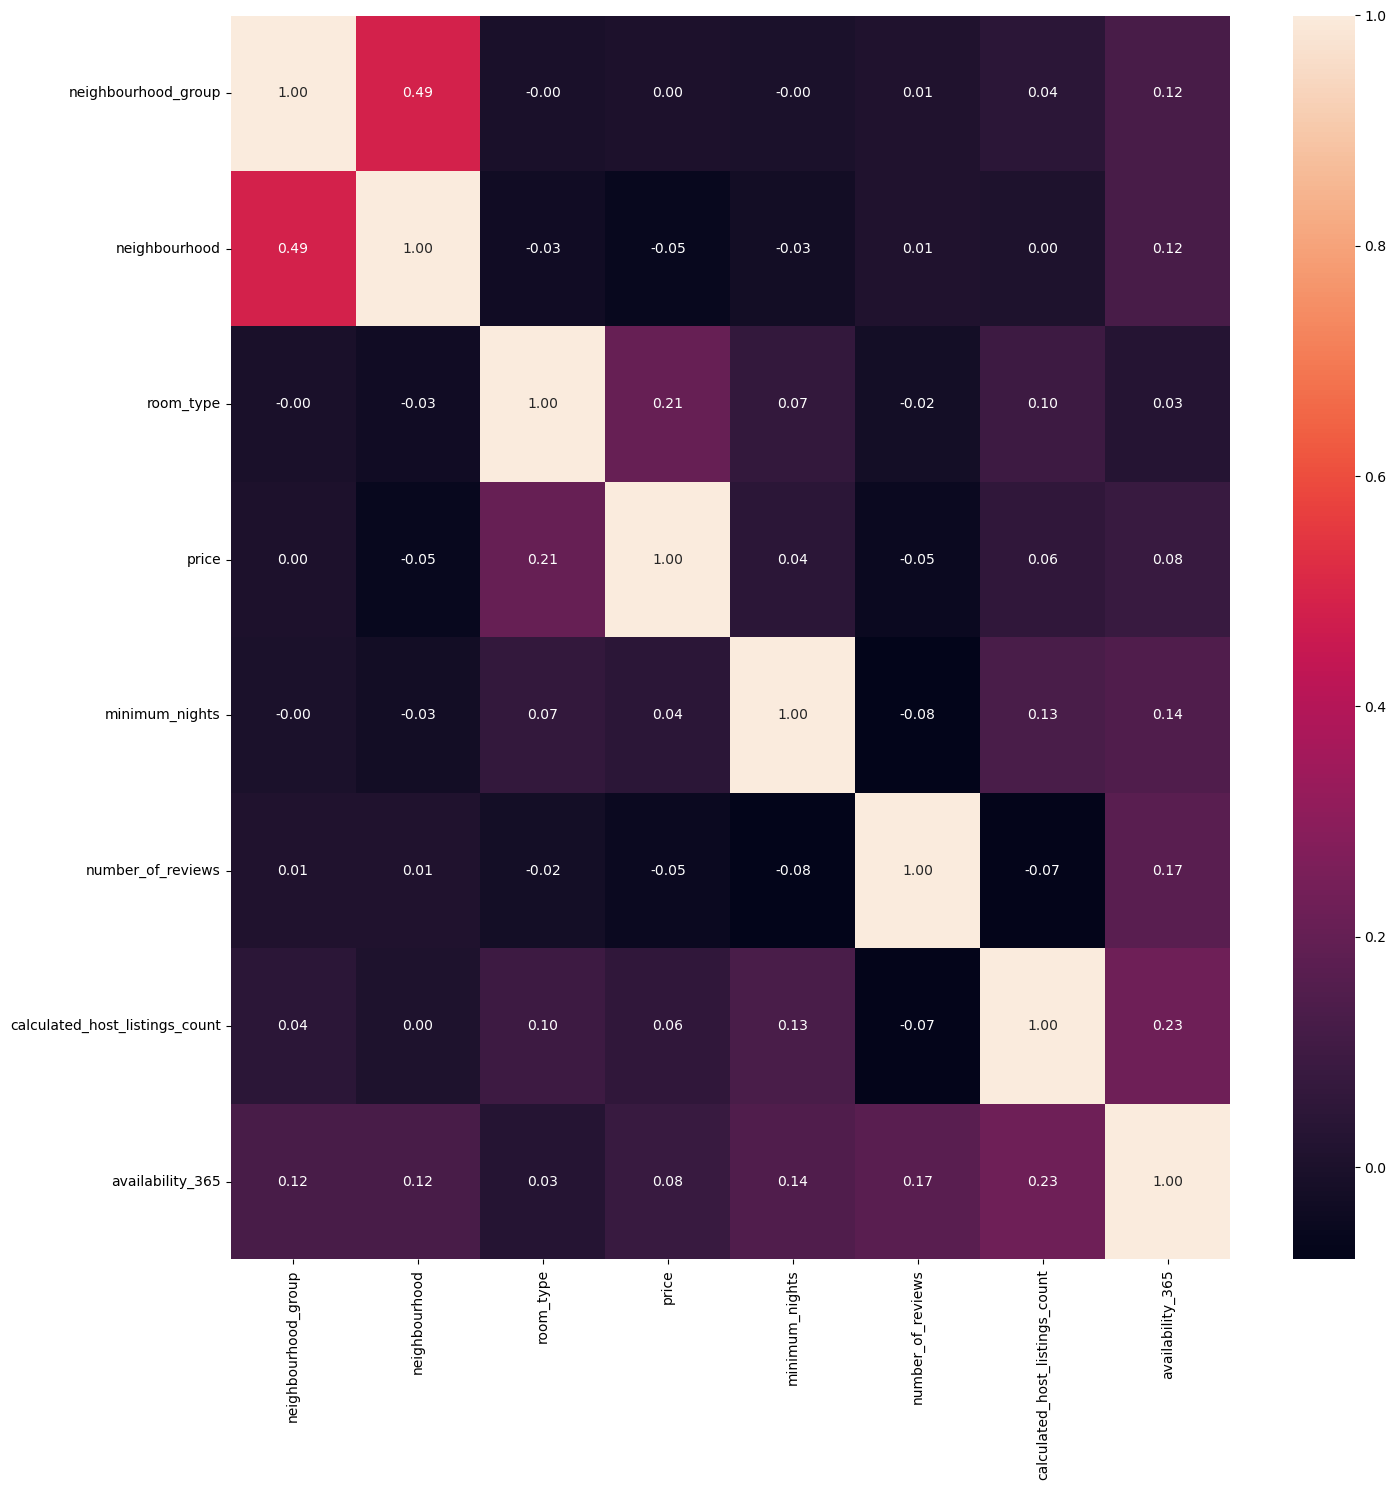

In [94]:
# Factorize the Room Type and Neighbourhood Data
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Looking at the data here, there's very low correlation between all data. At most:

Hosts with More Listings tend to have more availability.


Apart from this, it looks very bleak to draw in conclusion or relation.

### Analysing all the Data at Once

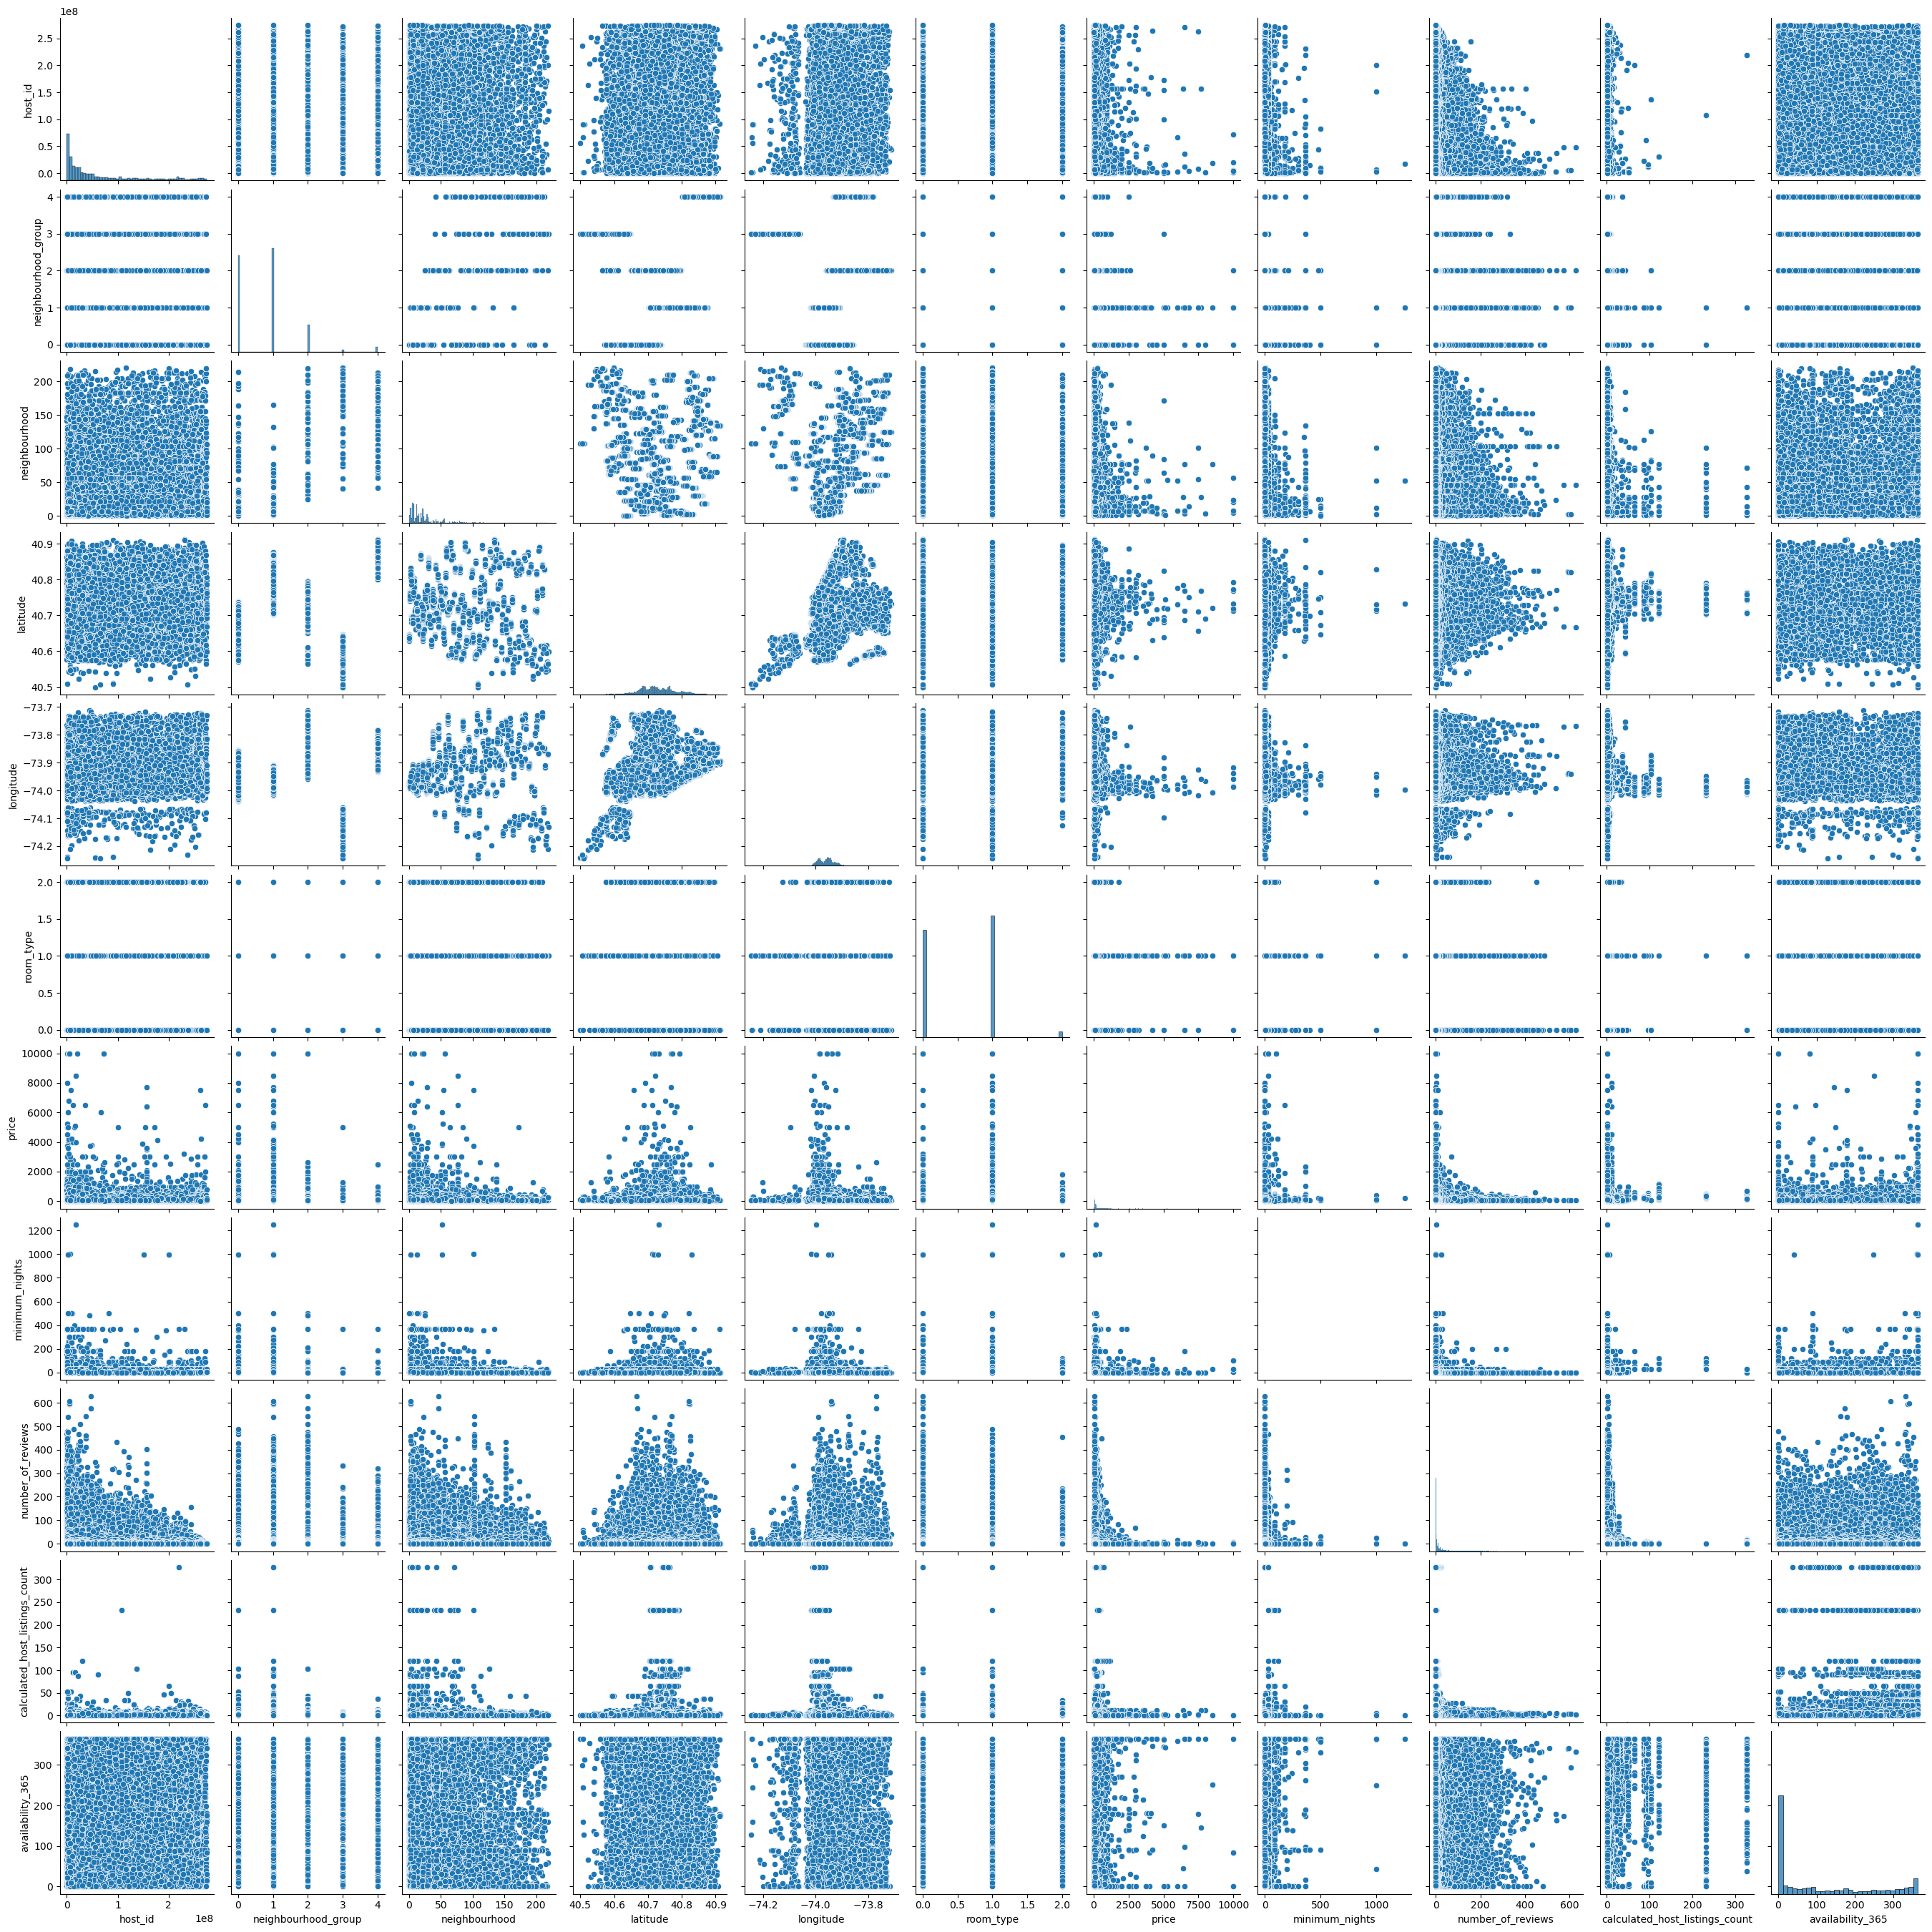

In [95]:
sns.pairplot(data = total_data)

## **Step 5: Feature engineering**

### Outlier analysis

In [96]:
total_data.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


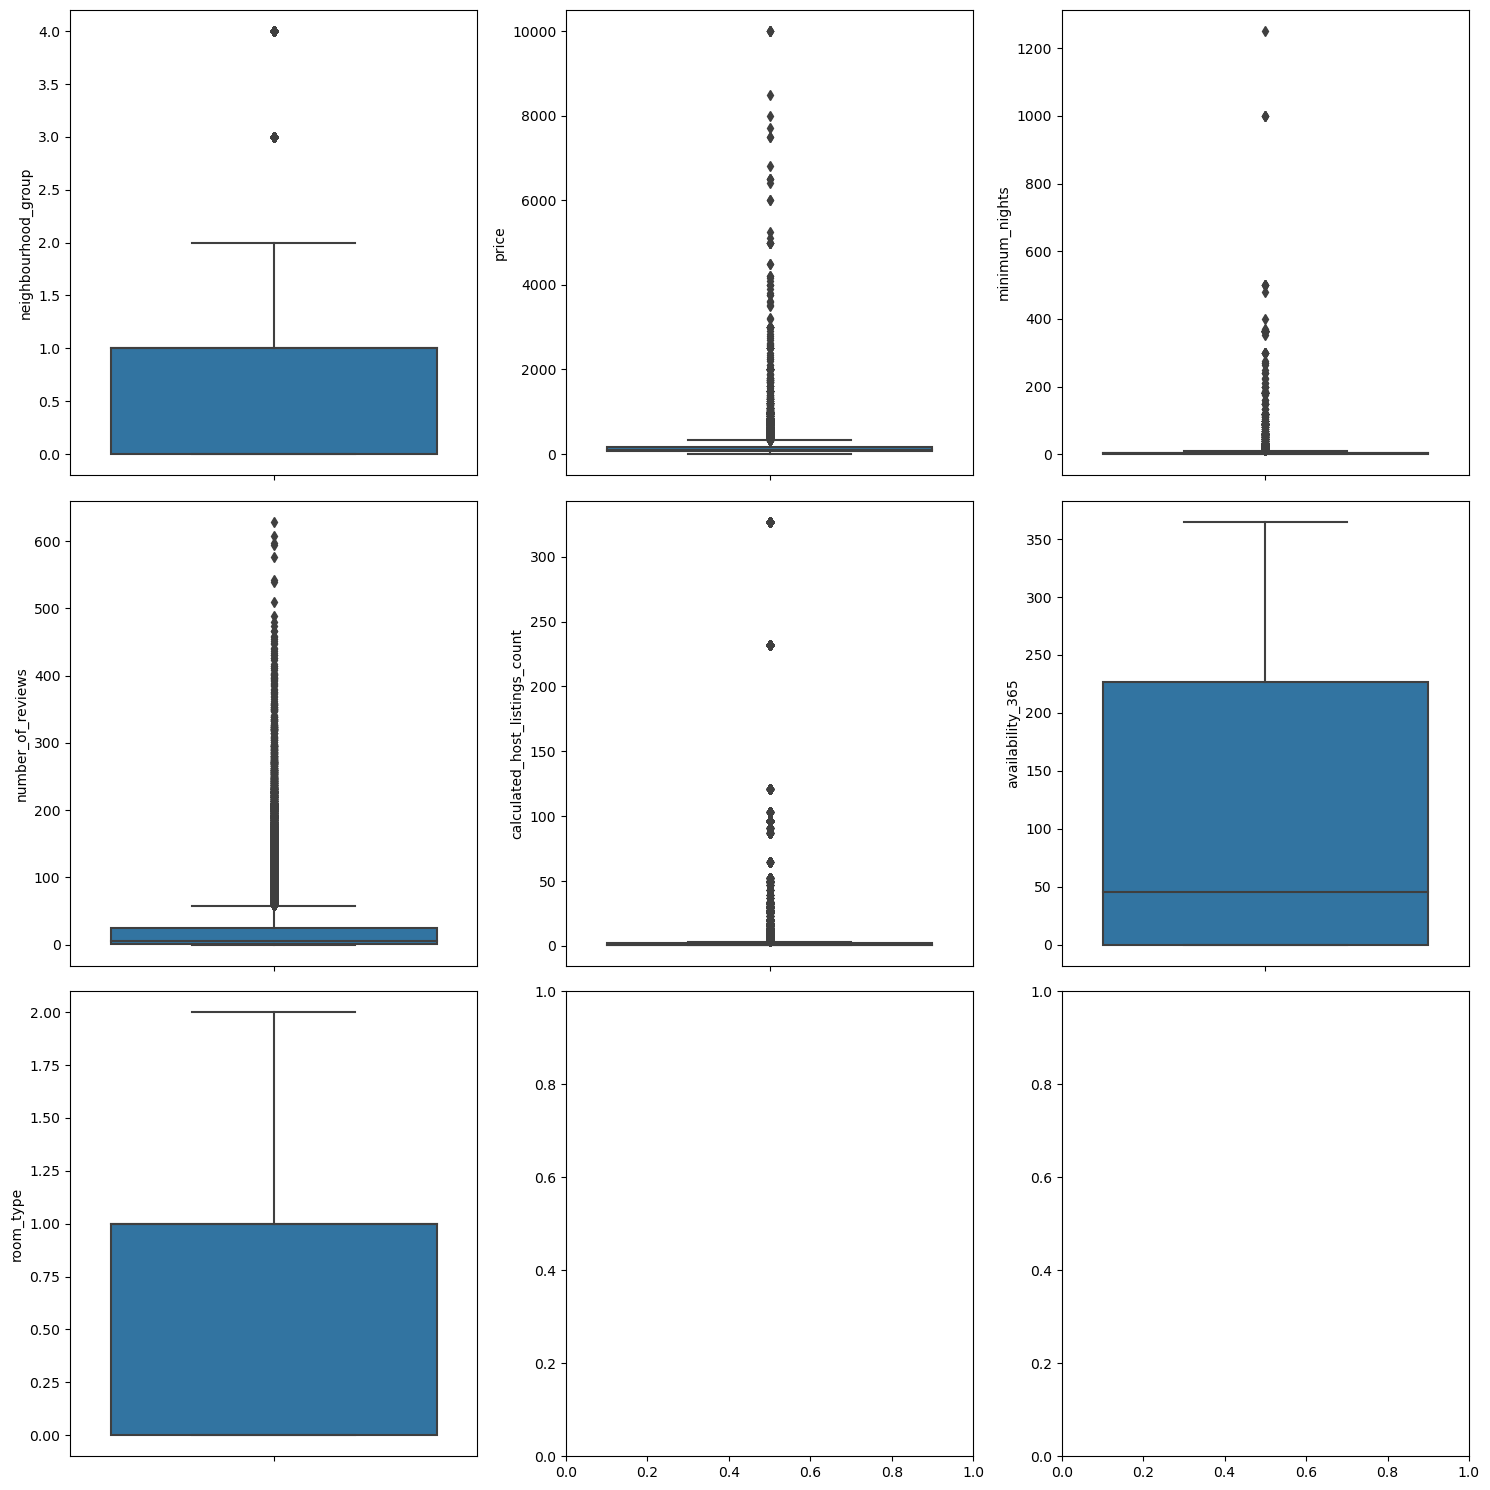

In [97]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type")

plt.tight_layout()

plt.show()

### Outlier detection for price

In [98]:
# Stats for Price
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [99]:
# IQR for Price

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of 106.0")


The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [100]:
"""price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

# Filtrar para incluir solo filas dentro de los límites
total_data_cleaned = total_data[(total_data["price"] >= lower_limit) & (total_data["price"] <= upper_limit)]"""

'price_iqr = price_stats["75%"] - price_stats["25%"]\nupper_limit = price_stats["75%"] + 1.5 * price_iqr\nlower_limit = price_stats["25%"] - 1.5 * price_iqr\n\n# Filtrar para incluir solo filas dentro de los límites\ntotal_data_cleaned = total_data[(total_data["price"] >= lower_limit) & (total_data["price"] <= upper_limit)]'

In [101]:
"""# Imprimir los valores que fueron filtrados (outliers)
outliers = total_data[~((total_data["price"] >= lower_limit) & (total_data["price"] <= upper_limit))]
print("Valores que fueron filtrados (outliers):")
print(outliers)
"""

'# Imprimir los valores que fueron filtrados (outliers)\noutliers = total_data[~((total_data["price"] >= lower_limit) & (total_data["price"] <= upper_limit))]\nprint("Valores que fueron filtrados (outliers):")\nprint(outliers)\n'

In [102]:
# Clean the outliers

total_data = total_data[total_data["price"] > 130]

In [103]:
count_0 = total_data[total_data["price"] == 0].shape[0]
count_130 = total_data[total_data["price"] == 130].shape[0]

print("Count of 0: ", count_0)
print("Count of 130: ", count_130)

Count of 0:  0
Count of 130:  0


### Outlier detection for minimum_nights

In [104]:
nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    19193.000000
mean         7.910384
std         22.224938
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [105]:
# IQR for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of 4.0")

The upper and lower limits for finding outliers are 9.5 and -2.5, with an interquartile range of 4.0


In [106]:
# Clean the outliers

total_data = total_data[total_data["minimum_nights"] <= 15]

#falta hacer un limite de minimos

In [107]:
count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  3681
Count of 2:  4753
Count of 3:  3607
Count of 4:  1566


### Outlier detection for number_of_reviews

In [108]:
# Stats for number_of_reviews

review_stats = total_data["number_of_reviews"].describe()
review_stats

count    16486.000000
mean        22.904889
std         42.240553
min          0.000000
25%          1.000000
50%          6.000000
75%         23.000000
max        488.000000
Name: number_of_reviews, dtype: float64

In [109]:
# IQR for number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of 26.0")

The upper and lower limits for finding outliers are 56.0 and -32.0, with an interquartile range of 26.0


### Outlier detection for calculated_host_listings_count

In [110]:
# Stats for calculated_host_listings_count

hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    16486.000000
mean         5.525840
std         34.867803
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [111]:
# IQR for calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of 1.0")

The upper and lower limits for finding outliers are 1.0 and 1.0, with an interquartile range of 1.0


In [112]:
count_04 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  15542
Count of 1:  12806
Count of 2:  1773


In [113]:
# Clean the outliers

total_data = total_data[total_data["calculated_host_listings_count"] > 4]

### Feature scaling

In [114]:
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.044335,0.000000,0.003106,1.0,0.0,0.0,149
181,0.049261,0.538462,0.000000,1.0,0.5,0.5,350
200,0.029557,0.461538,0.000000,1.0,0.5,0.0,140
201,0.187192,0.461538,0.000000,1.0,0.5,0.5,265
229,0.004926,1.000000,0.000000,1.0,0.5,0.5,140


## **Step 6: Feature selection**

In [115]:
X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,room_type
0,0.059113,0.000000,0.037267,0.0
1,0.192118,0.000000,0.000000,0.0
2,0.182266,0.000000,0.006211,0.5
3,0.004926,0.153846,0.136646,0.5
4,0.000000,0.000000,0.000000,0.0


### **Save the clean and raw data**

In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)